# **DATA MODELLING**

## Objectives

* To identify clinical indicator that signify presence of an Mpox infection through logistic regression as an inferential statistic as well as machine learning algorithm in a pipeline.

## Inputs

* Cleaned Mpox dataset
* Encoded Mpox data
* Libraries like pandas, numPy, matplotlib, seaborn, plotly, statsmodels and scikit learn

## Outputs

* Statistical test results
* Machine learning model


---

# Change working directory

Changing the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection\\jupyter_notebooks'

Making the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection'

# Section 1: Import libraries and load cleaned dataset

Import libraries

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 

Load cleaned dataset

---

In [5]:
# Load encoded dataset for data analysis and modeling
df = pd.read_csv("Dataset/Mpox_Encoded2.csv")
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Fever,Swollen Nodes,Muscle Aches
0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,0
4,1,1,1,0,0,1,1,0,1,0,1,0


Further cleaning to keep all array same length for Modelling
* Split systemic illness into three separate variables

# Section 2: Inferential statistics
Inferential statistics is the branch of statistics that allows us to make predictions, generalizations, or conclusions about a larger population based on data collected from a sample. It goes beyond simply describing data (descriptive statistics) by using probability theory to estimate parameters, test hypotheses, and measure uncertainty. 

P-value:  A p-value measures how likely your observed results (or more extreme ones) would be if the null hypothesis were true. It is a tool for assessing evidence against the null. <br>

Confidence Interval: The confidence interval (CI) is a range of values that’s likely to include a population value with a certain degree of confidence. It is often expressed as a % whereby a population mean lies between an upper and lower interval.

In this section, I tested hypotheses 3 and 4:
* Having an HIV infection or other STIs does not significantly increase the likelihood of testing positive to Mpox.
* Fever, swollen notes, muscle aches, rectal pain, sore throat, penile oedema, oral lesions, solitary lesion or swollen tonsils are individually not significant indicators of Mpox infection

I used logistic regression to examine relationship between Mpox infection and each of the independent variables
* Logistic regression is primarily used to model and predict categorical outcomes, especially binary ones (e.g., Yes/No, True/False, 0/1). It estimates the probability of an event occurring based on input variables.
* It helps to identify which independent variables significantly influence the likelihood of an outcome.

Observations
* Based on the p-values and confidence intervals, the presense of the following features (Rectal Pain, Sore Throat, Penile Oedema, Oral Lesions, Solitary Lesion, Swollen Tonsils, HIV Infection, Sexually Transmitted Infection, Fever, Swollen Nodes) significantly increase the likelihood of Mpox.

In [6]:
# Fit logistic regression model using statsmodels to get detailed summary
X = df.drop('MonkeyPox', axis=1) 
y = df['MonkeyPox']
X = sm.add_constant(X)  # Adds a constant term to the predictors
logit_model = sm.Logit(y, X) 
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.594109
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              MonkeyPox   No. Observations:                25000
Model:                          Logit   Df Residuals:                    24988
Method:                           MLE   Df Model:                           11
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.09363
Time:                        14:41:34   Log-Likelihood:                -14853.
converged:                       True   LL-Null:                       -16387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3316      0.049    -27.315     

In [7]:
# compute odds ratios and confidence intervals for the coefficients
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

# Identify significant features based on p-values
significant_features = result.pvalues[result.pvalues < 0.05].index.tolist() 
print("Significant features based on p-values:", significant_features)

                                    2.5%     97.5%        OR
const                           0.239989  0.290525  0.264051
Rectal Pain                     1.792845  2.002385  1.894721
Sore Throat                     1.279147  1.427844  1.351452
Penile Oedema                   1.256998  1.403017  1.328002
Oral Lesions                    1.217136  1.358604  1.285926
Solitary Lesion                 1.125075  1.255681  1.188585
Swollen Tonsils                 1.018454  1.136640  1.075925
HIV Infection                   1.862129  2.079792  1.967953
Sexually Transmitted Infection  1.693049  1.890814  1.789201
Fever                           2.564307  3.000190  2.773700
Swollen Nodes                   2.356677  2.755009  2.548071
Muscle Aches                    0.878524  1.017955  0.945673
Significant features based on p-values: ['const', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'Feve

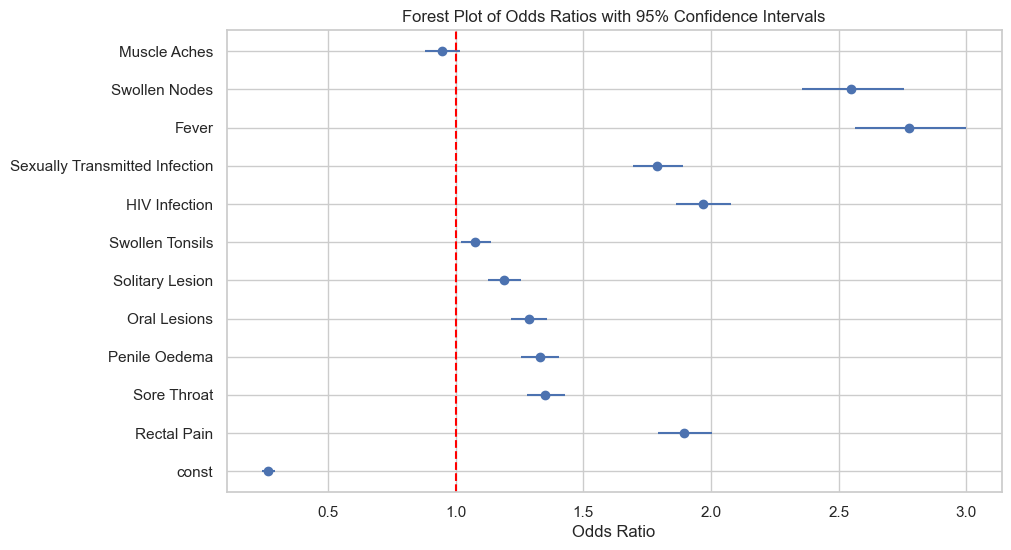

In [8]:
# Plots for visualizing odds ratios on forest plot interactively using matplotlib 
odds_ratios = np.exp(result.params)
conf_int = result.conf_int()
conf_int_exp = np.exp(conf_int)
plt.figure(figsize=(10, 6))
plt.errorbar(odds_ratios, range(len(odds_ratios)),
                xerr=[odds_ratios - conf_int_exp[0], conf_int_exp[1] - odds_ratios],
                fmt='o')
plt.yticks(range(len(odds_ratios)), odds_ratios.index)
plt.axvline(x=1, color='red', linestyle='--')
plt.xlabel('Odds Ratio')
plt.title('Forest Plot of Odds Ratios with 95% Confidence Intervals')
plt.show()

# Section 2: Machine Learning Modelling - Classification

In this sestion, I used ML to build a predictor model for Mpox infection. ML is a data-driven approach that uses algorithms to learn patterns and relationships from the data without being explicitly programmed.

* I performed ML modelling for two specific reasons:
  * To develop a model that can predict that a person has Mpox infection based on the clinical indicators and or presence of sexually-transmitted infections
  * To identify important clinical indicators and infections that healthworker cares should pay close attention to during Mpox outbreaks and they are strongly linked to Mpox infection - feature importance.

Step 1: Load cleaned and encoded dataset for ML Modelling

In [19]:
#Load encoded and cleaned dataset for data analysis and modeling
df = pd.read_csv("Dataset/Mpox_Encoded2.csv")
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Fever,Swollen Nodes,Muscle Aches
0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,0
4,1,1,1,0,0,1,1,0,1,0,1,0


Step 2: Split the data into train and test sets.

In [20]:
# Split the dataset into training and testing sets for model evaluation
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['MonkeyPox'],axis=1),
                                    df['MonkeyPox'],
                                    test_size=0.2,
                                    random_state=2025
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (20000, 11) (20000,) 
* Test set: (5000, 11) (5000,)


Step 3: Create a pipeline for linear regression. The function creates a pipeline that performs:
* Feature scaling
* Feature selection
* Model (Decision Tree) <br>
  
I employed Decision Tree Classifier model
* Given the target and all feature variables are non-linear, decision tree was preferred because of it's native ability to model complex, non-linear interactions between variables without requiring explicit transformations.
* A decision tree is like a flow chart, where each question has a yes/no answer. As you get deeper, you move from a general question to a very specific question. The questions asked must be ones where the yes or no answer gives useful insights into the data.

In [25]:
# Define FUNCTION Pipeline with StandardScaler and RandomForestClassifier

def Mpox_pipeline(): # Define the pipeline
    pipeline = Pipeline([ 
        ('scaler', StandardScaler()),
        ('feat selection', SelectFromModel(DecisionTreeClassifier(random_state=2025))),
        ('model', DecisionTreeClassifier(random_state=2025))
    ])
    return pipeline
Mpox_pipeline()

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=2025))),
                ('model', DecisionTreeClassifier(random_state=2025))])

Step 4: Fit the pipeline on the train set so that the model can learn the relationships between the features and the target.

In [27]:
# fit the pipeline to the training data
pipeline = Mpox_pipeline()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=2025))),
                ('model', DecisionTreeClassifier(random_state=2025))])

Step 5: Evaluate performance - Feature Importance 
* Extracted feature importance from the model
* Visualization of the feature importance
  
Observations:
* There are 5 features out of 11 that were used to train the model. There relevance ranges from 0.28 to 0.15 and together account for 98 percent of the model's outcome.
* These are the clinical indicators that together strongly indicate Mpox infection. Healthworkers need to pay close attention to these, especially during outbreaks.

                          Feature  Importance
4                   Swollen Nodes    0.286799
1                   HIV Infection    0.206491
0                     Rectal Pain    0.182951
3                           Fever    0.175476
2  Sexually Transmitted Infection    0.148283


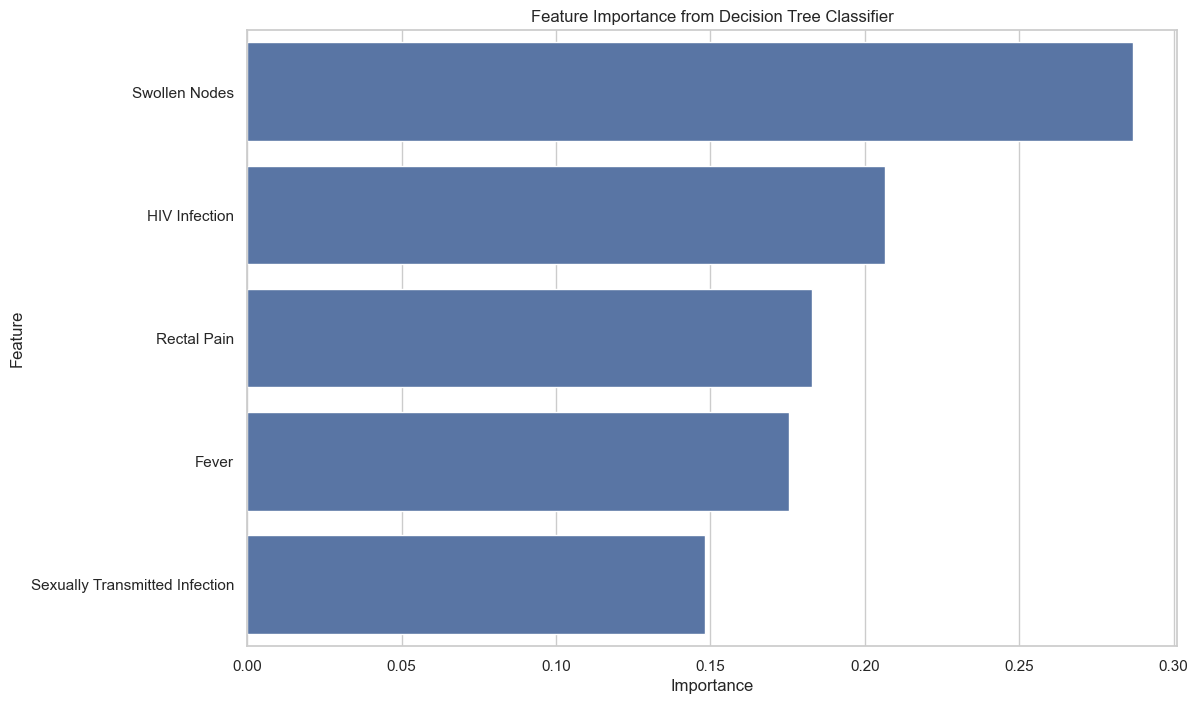

In [30]:
# Extract feature importance from the model in the pipeline
feature_selector = pipeline.named_steps['feat selection']
selected_features = X_train.columns[feature_selector.get_support()]
importances = pipeline.named_steps['model'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print (feature_importance_df)

# SNS barplot for feature importance visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree Classifier')
plt.show()

Step 6: Evaluate performance - Model/Classifier
* Evaluate model performance on the test set 
* Print classification report and confusion matrix

Observations: 
* The model performed relatively well on predicting presence of an Mpox infection. Precision, recall and f1-score are much higher for this class compared to Mpox negative predictions. This observation is consistent across train and test sets, which is an indication that the model learned all the relationships from the training data. Actually, the test set is marginally outperforming the train set.
* From a business case point of view, the model is acceptable given the interest is on finding Mpox cases and isolate or treat them to keep the public safe and contain the outbreak. 
* Nevertheless, the high number of false positives suggest the model may need to be fine-tuned further to make it more accurate

Train Set Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.41      0.49      7303
           1       0.71      0.84      0.77     12697

    accuracy                           0.68     20000
   macro avg       0.66      0.63      0.63     20000
weighted avg       0.67      0.68      0.67     20000



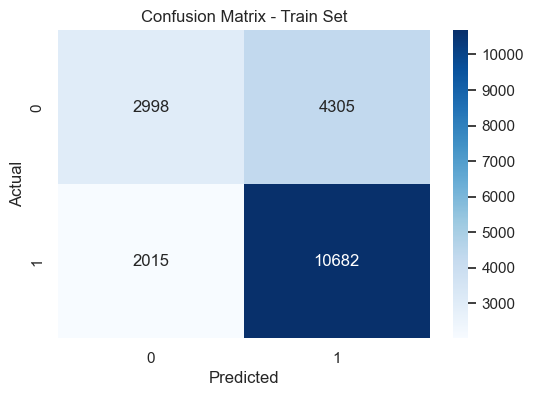

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.40      0.48      1788
           1       0.72      0.85      0.78      3212

    accuracy                           0.69      5000
   macro avg       0.65      0.62      0.63      5000
weighted avg       0.67      0.69      0.67      5000



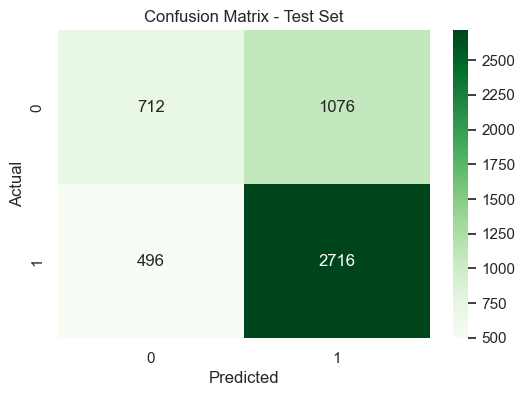

In [37]:
# Evaluate the model performance on both Train and Test set 

# Train set evaluation and print classification report and confusion matrix 
y_train_pred = pipeline.predict(X_train)
print("Train Set Classification Report:\n", classification_report(y_train, y_train_pred))
# Confusion matrix for Train set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Test set evaluation and print classification report and confusion matrix
y_test_pred = pipeline.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
# Confusion matrix for Test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Save the model for future use

In [38]:
# Save the trained pipeline model using joblib for future use
import joblib
joblib.dump(pipeline, 'Mpox_DecisionTree_Pipeline.pkl')

['Mpox_DecisionTree_Pipeline.pkl']

# Conclusion and next steps

* The analysis in this notebook has addressed the last two hypothesis of this project. In summary, it has been observed that having Rectal Pain, Sore Throat, Penile Oedema, Oral Lesions, Solitary Lesion, Swollen Tonsils, HIV Infection, Sexually Transmitted Infection, Fever, and Swollen Nodes significantly increase the likelihood of being diagnosed with Mpox.
* After fitting the ML model and evaluating it's performance, only five features were important predictors of Mpox Infection. 
* The ML model is a highly sensitive predictor or has a high true positive rate
* Next step is development of a Power BI Dashboard to present analysis results visually to enable quick, informed decisions, offering an at-a-glance view of key metrics, identifying trends, simplifying complex data through charts, and allowing for real-time monitoring and self-service exploration of data, saving time compared to static reports.   